<a href="https://colab.research.google.com/github/comaserious/deep_learning_practice/blob/main/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C_%EC%88%98%ED%96%89%ED%95%98%EB%8A%94_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('/content/sample_data/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('### train 데이터 정보')
print(titanic_df.info())

### train 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


값을 확인해보면 Name, Sex, Cabin, Embarked 가 float 값이 아니다 따라서 전처리로 핸들링 해주어야 한다

In [ ]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


null 값을 핸들링하기

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #inplace 원본객체 수정 여부
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 null 값 갯수', titanic_df.isnull().sum().sum())

데이터 세트 null 값 갯수 0


<ipython-input-5-99903a662d06>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #inplace 원본객체 수정 여부


null 값 합이 0 으로 나옴으로서 전처리가 되었음을 알 수 있다.

In [ ]:
print('Sex 값 분포 ', titanic_df['Sex'].value_counts())
print('Cabin 값 분포 ', titanic_df['Cabin'].value_counts())
print('Embarked 값 분포 ', titanic_df['Embarked'].value_counts())

Sex 값 분포  Sex
male      577
female    314
Name: count, dtype: int64
Cabin 값 분포  Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked 값 분포  Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].value_counts())

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

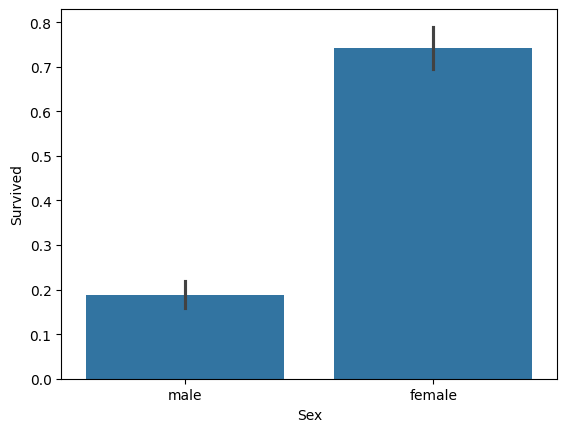

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

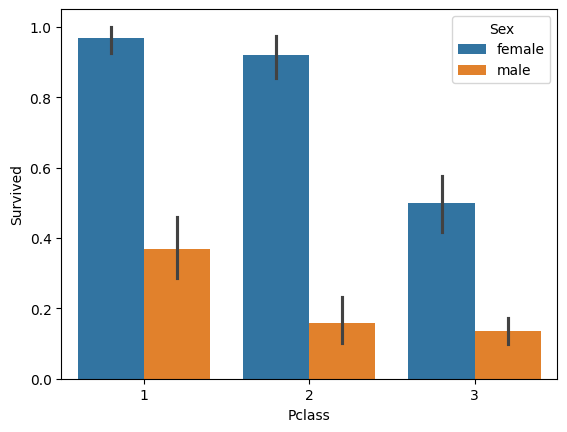

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [ ]:
def get_category(age):
  cat =''
  if age <= -1 : cat = 'Unknown'
  elif age <=5 : cat = "Baby"
  elif age <=12 : cat = "Child"
  elif age <=18 : cat = "Teenager"
  elif age <=25 : cat = "Student"
  elif age <=35 : cat = "Young Adult"
  elif age <=60 : cat = "Adult"
  else : cat = "Elder"

  return cat

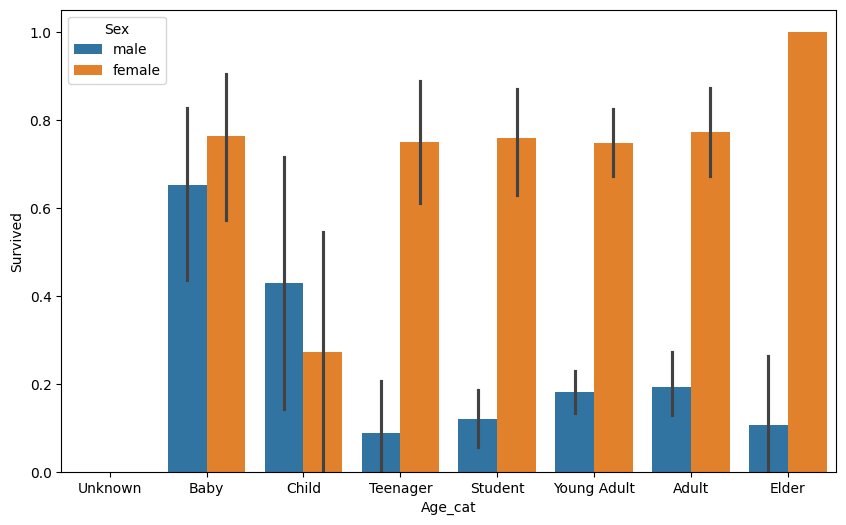

In [ ]:
plt.figure(figsize=(10,6))
gruop_names = ["Unknown" , "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Elder"]

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived' , hue ='Sex' , data=titanic_df, order=gruop_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature]= le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


object 값들을 구분하여 숫자로 변환해주는 라이브러리
preprocessing.LabelEncoder()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)

  return df


# 머신러닝에 불필요한 피처제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1 , inplace=True)

  return df

# 레이블 인코딩 수행
def format_feature(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex' , 'Embarked']

  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature]= le.transform(df[feature])

  return df

# 앞에서 정의한 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_feature(df)

  return df

In [ ]:
titanic_df= pd.read_csv('/content/sample_data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_tatanic_df = titanic_df.drop('Survived', axis=1)

x_titanic_df = transform_features(x_tatanic_df)
x_titanic_df


<ipython-input-21-8da2acc27cd0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-21-8da2acc27cd0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_clf = DecisionTreeClassifier(random_state =11)
df_clf = RandomForestClassifier(random_state =11)
lr_clf = LogisticRegression(solver='liblinear')

df_clf.fit(x_train, y_train)
df_pred = df_clf.predict(x_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, df_pred)))

df_clf.fit(x_train, y_train)
df_pred = df_clf.predict(x_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, df_pred)))

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도 : 0.8547
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8659


In [ ]:
from sklearn.model_selection import KFold

# 폴드 세트를 5개인 KFold 객체를 생성, 이걸 저장할 리스트 객체 생성
def exec_kfold(clf, folds =5):
  kfold = KFold(n_splits=folds)
  scores = []

  for inter_count , (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
    x_train , x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)

    print("교차검증 {0} 정확도 : {1:.4f}".format(inter_count, accuracy))

  mean_score = np.mean(scores)
  print("평균 정확도 : {0:.4f}".format(mean_score))


exec_kfold(df_clf, folds=5)


교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.8090
교차검증 2 정확도 : 0.8371
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8596
평균 정확도 : 0.8148


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
              'min_samples_split': [2,3,5], 'min_samples_leaf': [1,5,8]}

grid_dclf = GridSearchCV(df_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train,y_train)

print('GridSearchCV 최적 하이퍼 파리미터 : ',grid_dclf.best_params_ )
print('GrdinSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

# GridSearchCV 의 최적 하이퍼 파라미터로 학습된 Estimator 에측및평가 수행
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test,dpredictions)

print(f"테스트 세트에서 DecisionTreeClassifier 정확도 {accuracy}")

GridSearchCV 최적 하이퍼 파리미터 :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GrdinSearchCV 최고 정확도: 0.8146
테스트 세트에서 DecisionTreeClassifier 정확도 0.88268156424581
